# Crime in Chicago

## Introduction



Moving to a new place is always a difficult task when you have to choose where to live. You must take into consideration several factors that will influence heavily in your quality of life for the following months or years. Factors such as proximity to workplace, grocery stores, parking lots if needed, etc. can be easily identified.

However, there are other aspects that are more difficult to quantify. For example, how safe will you be in a neighborhood is not easy to determine.

In order to estimate the type of future crimes you may face when moving to a new area, a data analysis study is carried out. Knowing what is the most probably type of crime that you may have to face based on the most common venue that is in that place is a useful information that, if possible to extend to other cities, gives you a

This study is focused in the city of Chicago, IL, USA. Although the results and conclusions are specifically for this city, it is possible to extend them to other places that share similarities. Therefore, you can use the conclusions in your future movings when you want to have a better idea of how safe a place is. The target audience of this study is anyone who is moving to a new city or is planning to move, so if this is your case, I encourage you to continue reading.

## Data

This study uses two main sources of data.

First, crime data from the city of Chicago (https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2/data). The link shown above allows you to get a huge database about crimes commited in Chicago since 2001. It provides information about the kind of crime, the location (longitude and latitude), the community area or neighborhood, etc.

For the sake of simplicty and loading time, only a random sample from the city of Chicago data is used (around 0.1% of its records). This parameter can be changed by anyone who wants to run the notebook so the accuracy of the conclusions can be easily increased by increasing this parameter. However, 0.1% provides more than 6,000 rows so it is considered to be a valid amount of data for this case.

The most important fields that are used in this study are the community area where the crime happened, the location given by coordinates and the type of crime (theft, battery, assault, etc.)

Second, data about community areas in chicago (https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6). This database provides geospatial information about community areas boundaries, areas, names and numbers. These data are essential to associate community area names to the community area numbers provided in the Chicago Crime database previously mentioned.

Third, data from Foursquare is also used in order to characterize neighborhoods in Chicago, getting information about which are the most common venues in each community area. This information is directly extracted from Foursquare so it is always up to date.

Thanks to this information, it is possible to cluster neighborhoods depending on the most common venues, and so, it is possible to associate crimes with the most common venues in a community area.


## Methodology

First task carried out is to select those rows that have complete information in the Chicago crime database. This is done by removing records that have n/a values in order to work only with records that are fully completed.

Given the huge amount of records, using only complete records does not jeopardize the accuracy of the study. For example, the total amount of recods (rows) in this data base is 7312121, more than 7 million. After droping n/a values, there are 6627730 remaining rows, more than 6.5 millions.

Some exploratory analysis were carried out to understand better this database. For example, getting the list of different crimes that are recorded or the the amount of each of them.

When exploring the fields in this database, you notice that the community area where the crime happened is only referred by its number. This is not enough to get valid information from Foursquare. Besides, community area numbers convey very poor information to stakeholders who are interested in their neighborhoods but they do not knowh which number are they. Given this problem, the data about community areas in Chicago was used. Consequently, crime data now has a community area name were it happened and it can be linked to Foursquare information.

Then, the location of the city of Chicago is obtained to center the map on it and provide a reasonable level of zoom when using the map.

As mentioned in the data section, to avoid large wait times when processing the crime database, only a random sample of it is used. Therefore, 0.1% of crimes are selected and a new dataframe with these data is created.

Next, Foursquare data is obtained by requesting information about venues in each community area. This is done through a function that creates the API request URL with my personnal identification. Information retrieved this way is processed to get the percentage of each venue for every community area. To work with useful information, only the top venues per community area are used.

Then, Chicago crime data and Foursquare data are combined in order to have for each crime, which are the most common venues in that community are where the crime happened.

To have a more representative distribution of common venues through the city of Chicago, a k-means clustering algorithm was performed. This way, it is possible to visualize quickly how the city most common venues are distributed. Eight clusters were defined depending on the most common venues in each community area, therefore, each crime is associated to one of the clusters.

By representing crime data location and clusters in a map an interesting visualization is represented. First, it is possible to see where happened each crime, and so, you can see that there are areas with higher criminality rates than others. Moreover, you can see the kind of venues that a neighborhood have by the different colors in the map. This way, you can see if a specific area that present more crimes have a particular amount of venues.

Due to the necessity of examining the map in detail to extract importarnt insights from it, a further analysis is carried out by identifying the most common venue of each cluster and then analyzing the crime data with the location data to know for each type of crime, what is the most common venue in the place where the crime happened.

## Results

To have a fast context of the data, it is important to have in mind that there were approximately 7 million crimes since 2021, that is, about 1000 crimes per day. Given a population of 2.7 million people, there is crime every day per 2,700 people. If we assume that one crime affects only to one person, it means that you have a 0.037% probability of suffer a crime every day. Applying probability, we have that if you have moved to Chicago for one year, there is a 12.65% probability that you suffer one crime during that period of time. Therefore, it is important to have into consideration the conclusiones got from this analysis.

First interesting result is the distribution of venues in Chicago:
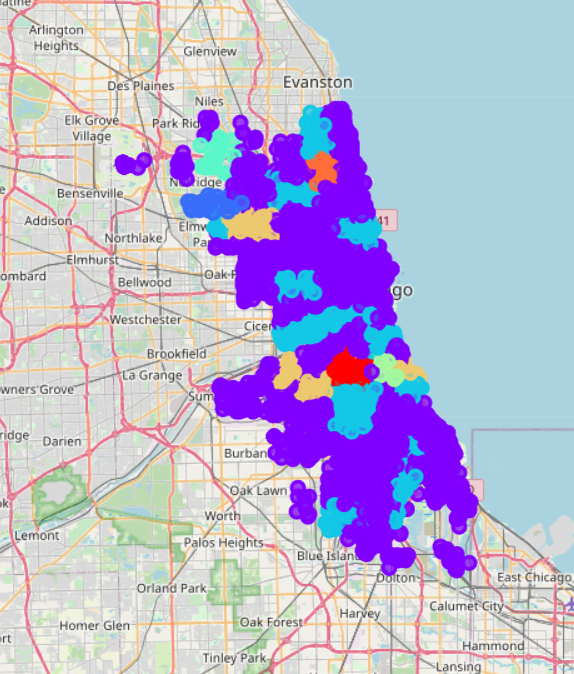
We can see that there are two main clusters: 1 and 3. They simbolize Bars and Fast food restaurants, respectively. These are the most common venues in most of community areas in Chicago. By exploring the map it is possible to see some others results for specific areas.

In general, Chicago's most common venue is Fast food restaurant, followed by Bar. The following list summarized the percentages of each venue in Chicago. It shows the the first most common venue for each community area where a crime happened. For example, 12.22% of crimes happened in an area where Fast food restaurant is the most common area, whereas only 1.9% of crimes happened in a community area where the most common venue is Nightclub.

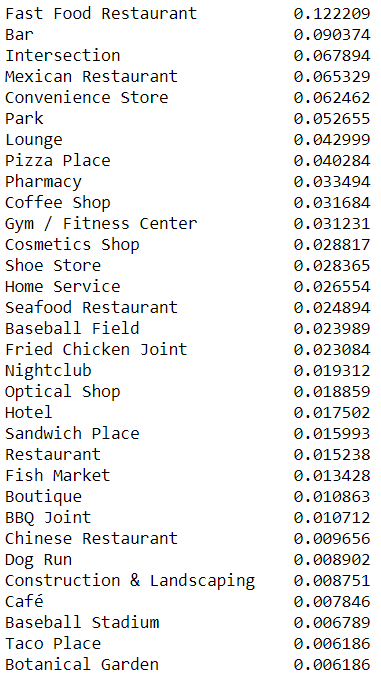

This information does not tell too much because it is clear that there are more crimes in places with more Fast food restaurants than in places with Nightclubs due to the fact that there are more community areas with Fast food restaurans as the most common venue than than Nightclubs.

However, as we want to know how safe is neighborhood based on this data, it is possible to know if a certain area is safer than other for different types of crimes. To do that the Chicago crime database is splitted between the different types of crimes (theft, battery, criminal damage, etc.) And then, the most common venue is calculated. The following list summarizes the information:

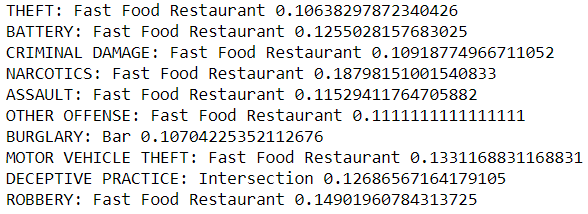

The list above shows the percentage of crimes that have the venue as the most common place in an area for each type of crime. For example, 10.63% of thefts happened in a neighborhood where the most common venue is a Fast food restaurant.

If there were no correlation between crime type and the most common venue, all types of crimes should be equal to 12.22% in a Fast food restaurant. However, we can see that this is not the case.

## Discussion

As noted in the previous section, there are certain correlation between the type of crime and the most common venue in an area. If no correlation existed, it always should be like the general value: Fast food restaurant 12.22%. Of course, it is virtually impossible to have the same value in all categories but it should be close to it if no correlation exists. There are three categories that can be noted as different.

First, Narcotics crime. It happens to be more common in places where the most common venue is a Fast food restaurant (about 50% more crimes of this type than expected). In this case, 18.80% of Narcotics crimes happened in community areas where the Fast food restaurants is the most common venue.

Second, Burglary. In this case, the most common venue changes and it is not longer Fast food restaurants but Bars. 10.70% of Burglary crimes took place in community areas where Bars where the most common venue.

Third, Deceptive practice. It should be noted that those areas where Intersections are the most common venue, are more likely to suffer from this crime. 12.69% of Deceptive practice crimes happened in community areas where Intersections were the most common venue.

The other types of crimes do not show large differences between them and the expected value.

Given these results, you can get information about the most common venue in the community area you want to live and pay extra attention to possible crimes that could happen. For example, examining the clustering map of Chicago, you can see that a certain area may have lots of intersections so you should be aware of the deceptive practices, as they tend to be more common in that place.

Similary, not only when you are planning to move to a new place, but also when you are in an area with plenty of Bars, you may want to be more aware of possible burglary crimes.

Of course, this study is limited by the amount of recods used. In order to get more accurate results, is is possible to repeat the analysis with more recods, or even the whole database. If that is done, it is possible that the values above explained changed and there would be other outcomes. This is the main limitation of this study that can be overcome by using more rows when running the code (more rows where not used by the author due to computation limitation).

## Conclusions

After carrying out this study, the main conclusion is the existance of a correlation between the most common venue in a place and the type of crimes that happen there. Not only that correlation exists, but also is it possible to quantify it. As shown above, for example, areas that present more intersections are more likely to suffer from deceptive practices.

You can use this information when moving to a new town and exploring the city, so you can expect to suffer more from a type or other type of crime. Additionally, you can also use this information when you are in a new area, even if you are not planning to move there, and you see a higher than usual concentration of specific venues. If the resutls from this study can be extended to other cities, you can easily know what you have to pay attention to. For example, if you are in an area with lots of bars you will want to be aware of burglary crimes.

As mentioned above, the accuracy of this study is determined by the amount of rows used in the analysis. Given the probabilistic approach used when selecting random samples from the database, it is advised to not rely completely in the results from this specific analysis.